In [28]:
import pandas as pd
import metpy.calc as mpcalc
import matplotlib.pyplot as plt
from metpy.units import units
from metpy.interpolate import interpolate_to_grid
from datetime import datetime,timedelta
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from metpy.plots import USCOUNTIES
from metpy.calc import wind_components, reduce_point_density
from metpy.units import units
from metpy.plots import StationPlot
from datetime import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# First define the format and then define the lambda function
timeFormat = "%Y-%m-%d %H:%M:%S EDT"
# This function will iterate over each string in a 1-d array
# and use Pandas' implementation of strptime to convert the string into a datetime object.
parseTime = lambda x: datetime.strptime(x, timeFormat)  

In [30]:
df6 = pd.read_csv('/Users/Erik Creighton/1JupyterNotebooks/202406.csv')
df7 = pd.read_csv('/Users/Erik Creighton/1JupyterNotebooks/202407.csv')
df8 = pd.read_csv('/Users/Erik Creighton/1JupyterNotebooks/202408.csv')
dffin = pd.concat([df6, df7, df8], axis=0)

dfOR = pd.read_csv('/Users/Erik Creighton/1JupyterNotebooks/ORL.csv')
dfOR


,station,valid,tmpf,dwpf
0,ORL,2024-06-01 00:53,79.00,60.00
1,ORL,2024-06-01 01:53,78.00,61.00
2,ORL,2024-06-01 02:53,77.00,62.00
3,ORL,2024-06-01 03:53,75.00,62.00
4,ORL,2024-06-01 04:53,75.00,62.00
...,...,...,...,...
2538,ORL,2024-08-20 19:53,84.00,74.00
2539,ORL,2024-08-20 20:53,84.00,75.00
2540,ORL,2024-08-20 21:53,84.00,74.00
2541,ORL,2024-08-20 22:53,84.00,74.00


In [33]:
df_mesonet = dffin
df_asos = dfOR

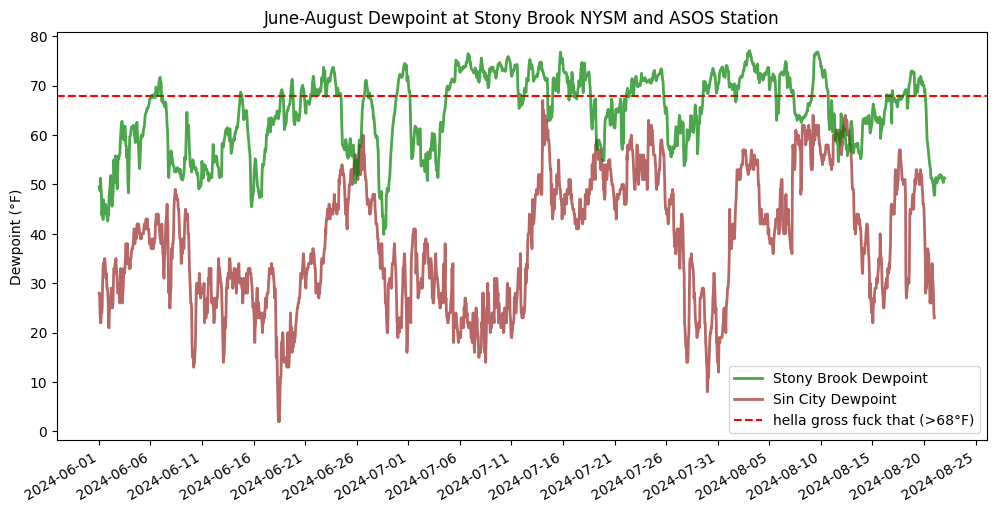

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the Mesonet data
df6 = pd.read_csv('/Users/Erik Creighton/1JupyterNotebooks/202406.csv')
df7 = pd.read_csv('/Users/Erik Creighton/1JupyterNotebooks/202407.csv')
df8 = pd.read_csv('/Users/Erik Creighton/1JupyterNotebooks/202408.csv')
dffin = pd.concat([df6, df7, df8], axis=0)

# Load the ASOS data
df_asos = pd.read_csv('/Users/Erik Creighton/1JupyterNotebooks/ORL.csv')
df_asos1 = pd.read_csv('/Users/Erik Creighton/1JupyterNotebooks/LAS.csv')

# Reset index to avoid issues with duplicate labels
df_mesonet = dffin.reset_index(drop=True)
df_asos = df_asos.reset_index(drop=True)
df_asos1 = df_asos1.reset_index(drop=True)

# Convert the 'time_end' column in Mesonet data to datetime format
df_mesonet['time_end'] = pd.to_datetime(df_mesonet['time_end'])

# Convert the 'valid' column in ASOS data to datetime format
df_asos['valid'] = pd.to_datetime(df_asos['valid'])
df_asos1['valid'] = pd.to_datetime(df_asos1['valid'])

# Replace 'M' with NaN, then drop NaNs and convert columns to numeric values
df_mesonet['dewpoint_avg [degF]'] = pd.to_numeric(df_mesonet['dewpoint_avg [degF]'].replace('M', pd.NA), errors='coerce')
df_asos['dwpf'] = pd.to_numeric(df_asos['dwpf'].replace('M', pd.NA), errors='coerce')
df_asos1['dwpf'] = pd.to_numeric(df_asos1['dwpf'].replace('M', pd.NA), errors='coerce')

# Drop any rows where the temperature or dewpoint is NaN
df_mesonet = df_mesonet.dropna(subset=['dewpoint_avg [degF]'])
df_asos = df_asos.dropna(subset=['dwpf'])
df_asos1 = df_asos1.dropna(subset=['dwpf'])

# Plotting the data
plt.figure(figsize=(12, 6))

# Plot Mesonet dewpoint data
plt.plot(df_mesonet['time_end'], df_mesonet['dewpoint_avg [degF]'], linewidth=2, color='green', label='Stony Brook Dewpoint', alpha=0.7 ,zorder=3)

# Plot ASOS dewpoint data
#plt.plot(df_asos['valid'], df_asos['dwpf'], linewidth=2, color='dodgerblue', label='Orlando Dewpoint', alpha=0.5, zorder=2)
plt.plot(df_asos1['valid'], df_asos1['dwpf'], linewidth=2, color='darkred', label='Sin City Dewpoint', alpha=0.6, zorder=1)

plt.axhline(y = 68, color = 'r', linestyle = 'dashed', label='hella gross fuck that (>68°F)') 

# Set the format of the x-axis to show only the date, with ticks every 5 days
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))

# Rotate date labels for better readability
plt.gcf().autofmt_xdate()

# Add labels and title
plt.ylabel('Dewpoint (°F)')
plt.title('June-August Dewpoint at Stony Brook NYSM and ASOS Station')
plt.legend()

# Show the plot
plt.show()



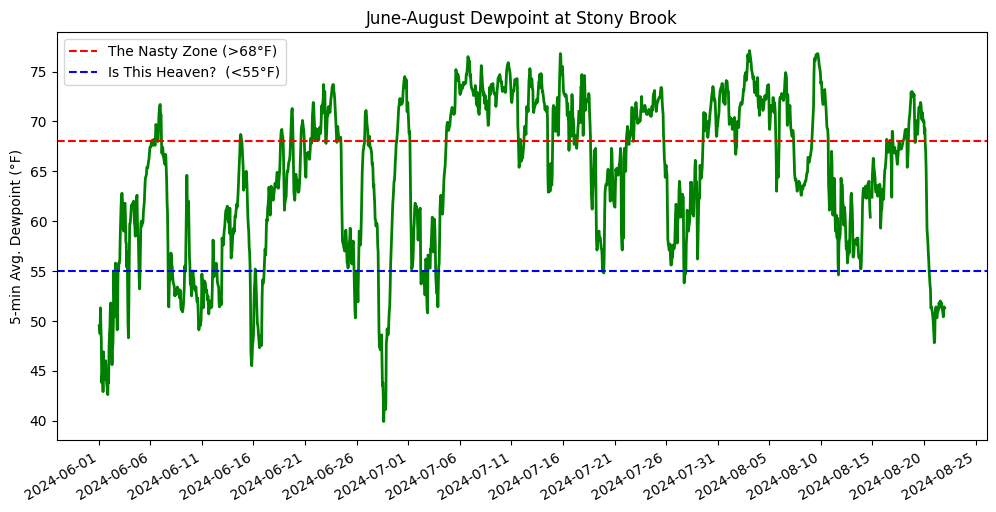

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df6 = pd.read_csv('/Users/Erik Creighton/1JupyterNotebooks/202406.csv')
df7 = pd.read_csv('/Users/Erik Creighton/1JupyterNotebooks/202407.csv')
df8 = pd.read_csv('/Users/Erik Creighton/1JupyterNotebooks/202408.csv')
dffin = pd.concat([df6, df7, df8], axis=0)

# Convert the time_end column to datetime format
dffin['time_end'] = pd.to_datetime(dffin['time_end'])

# Plot dewpoint_avg against time_end
plt.figure(figsize=(12, 6))
plt.plot(dffin['time_end'], dffin['dewpoint_avg [degF]'], linewidth=2, color='green')
plt.axhline(y = 68, color = 'r', linestyle = 'dashed', label='The Nasty Zone (>68°F)') 
plt.axhline(y = 55, color = 'b', linestyle = 'dashed', label='Is This Heaven?  (<55°F)') 


# Set the format of the x-axis to show only the date, with ticks every 5 days
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))

# Rotate date labels for better readability
plt.gcf().autofmt_xdate()

# Add labels and title
#plt.xlabel('Date')
plt.ylabel('5-min Avg. Dewpoint (°F)')
plt.title('June-August Dewpoint at Stony Brook')
plt.legend() 
# Show the plot
plt.show()


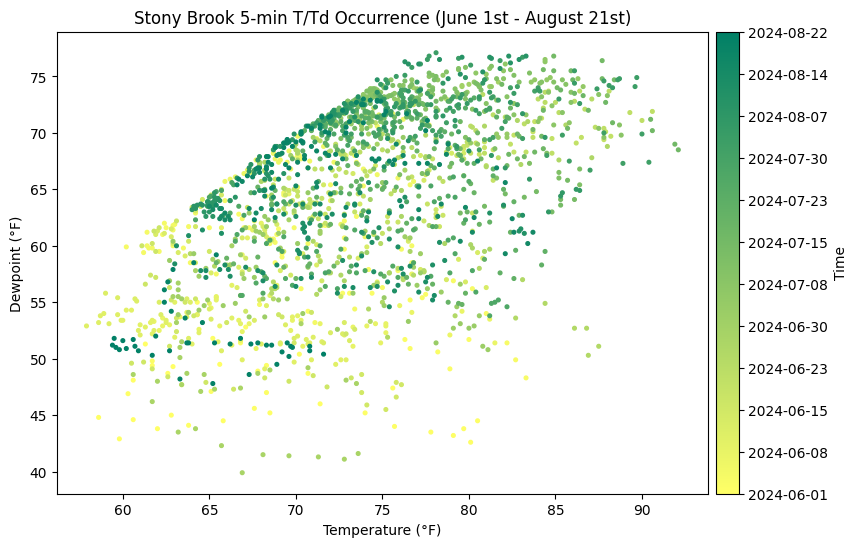

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the data
df = dffin

# Convert the 'time_end' column to datetime
df['time_end'] = pd.to_datetime(df['time_end'], format='%Y-%m-%d %H:%M:%S UTC')

# Extract the necessary columns
time = df['time_end']
temp = df['temp_2m_avg [degF]']
dewpoint = df['dewpoint_avg [degF]']

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot with smaller dots and colormap based on time
sc = ax.scatter(temp, dewpoint, c=mdates.date2num(time), cmap='summer_r', s=7)

# Add colorbar with 12 tick marks
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', pad=0.01)
cbar.set_label('Time')
cbar.set_ticks(np.linspace(mdates.date2num(time.min()), mdates.date2num(time.max()), 12))
cbar.set_ticklabels(pd.to_datetime(mdates.num2date(cbar.get_ticks())).strftime('%Y-%m-%d'))

ax.set_xlabel('Temperature (°F)')
ax.set_ylabel('Dewpoint (°F)')
ax.set_title('Stony Brook 5-min T/Td Occurrence (June 1st - August 21st)')

plt.show()


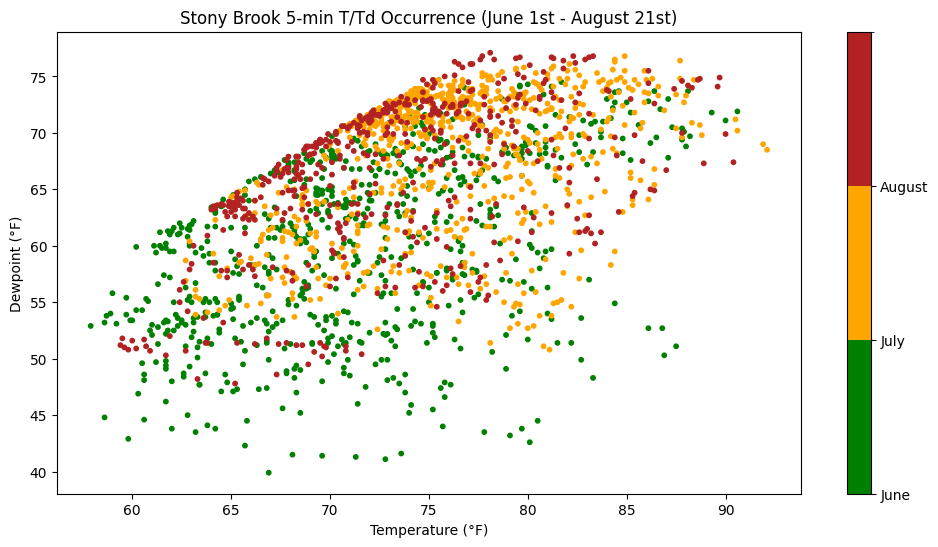

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.dates as mdates

# Load the data
df = dffin

# Convert time column to datetime
df['time_end'] = pd.to_datetime(df['time_end'], utc=True)

# Define temperature and dewpoint
temperature = df['temp_2m_avg [degF]']
dewpoint = df['dewpoint_avg [degF]']
time_values = df['time_end']

# Create discrete colormap for June (yellow), July (orange), August (dark red)
cmap = ListedColormap(['green', 'orange', 'firebrick'])
bounds = [mdates.date2num(pd.to_datetime('2024-06-01', utc=True)), 
          mdates.date2num(pd.to_datetime('2024-07-01', utc=True)), 
          mdates.date2num(pd.to_datetime('2024-08-01', utc=True)), 
          mdates.date2num(pd.to_datetime('2024-09-01', utc=True))]
norm = BoundaryNorm(bounds, cmap.N)

# Plotting
plt.figure(figsize=(12, 6))
sc = plt.scatter(temperature, dewpoint, c=mdates.date2num(time_values), cmap=cmap, norm=norm, s=10)

# Add colorbar with custom tick marks
cbar = plt.colorbar(sc, ticks=bounds[:-1])
cbar.ax.set_yticklabels(['June', 'July', 'August'])

# Labels and title
plt.xlabel('Temperature (°F)')
plt.ylabel('Dewpoint (°F)')
plt.title('Stony Brook 5-min T/Td Occurrence (June 1st - August 21st)')

plt.show()


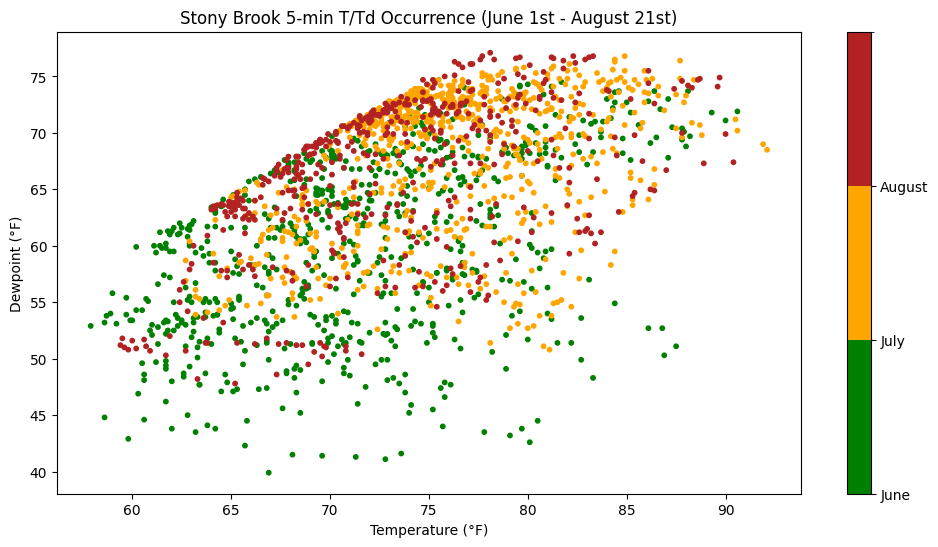

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.dates as mdates

# Load the data
df = dffin

# Convert time column to datetime
df['time_end'] = pd.to_datetime(df['time_end'], utc=True)

# Define temperature and dewpoint
temperature = df['temp_2m_avg [degF]']
dewpoint = df['dewpoint_avg [degF]']
time_values = df['time_end']

# Create discrete colormap for June (yellow), July (orange), August (dark red)
cmap = ListedColormap(['green', 'orange', 'firebrick'])
bounds = [mdates.date2num(pd.to_datetime('2024-06-01', utc=True)), 
          mdates.date2num(pd.to_datetime('2024-07-01', utc=True)), 
          mdates.date2num(pd.to_datetime('2024-08-01', utc=True)), 
          mdates.date2num(pd.to_datetime('2024-09-01', utc=True))]
norm = BoundaryNorm(bounds, cmap.N)

# Plotting
plt.figure(figsize=(12, 6))
sc = plt.scatter(temperature, dewpoint, c=mdates.date2num(time_values), cmap=cmap, norm=norm, s=10)

# Add colorbar with custom tick marks
cbar = plt.colorbar(sc, ticks=bounds[:-1])
cbar.ax.set_yticklabels(['June', 'July', 'August'])

# Labels and title
plt.xlabel('Temperature (°F)')
plt.ylabel('Dewpoint (°F)')
plt.title('Stony Brook 5-min T/Td Occurrence (June 1st - August 21st)')

plt.show()
